# CWI

In [1]:
from NLP_utils import *
import os
import json
from tqdm import tqdm
import pandas as pd

In [2]:
df_no = pd.read_csv("df_no_author_tf.csv")
df_with = pd.read_csv("df_with_author_tf.csv")

In [3]:
df_no["cleaned_content"]

0                                                  동패낙송권 상
1                                                       광작
2                                        여주에 허 성의 양반이 있었다.
3                                      그는 어질고 착하나 몹시 가난했다.
4        집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...
                               ...                        
11660    이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시...
11661                “오, 초 양국이 정사폐한지 오래매 급히 행하여 국사를 다스리라.”
11662    하시고 길을 재촉하시니 황은을 축수하고 물러나와 치행을 차려 떠날새, 부사 불러 서...
11663    이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...
11664                             대강 기록하여 세상 사람을 뵈이게 함일러라.
Name: cleaned_content, Length: 11665, dtype: object

In [4]:
df_no["cleaned_content"] = df_no.apply(lambda row: row["transformed"] if pd.notnull(row["transformed"]) else row["cleaned_content"], axis=1)
df_no

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,transformed
0,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,1,《동패낙송(東稗洛誦)》권 상(上),《동패낙송(東稗洛誦)》권 상(上),동패낙송권 상,0.000000,7,NaN
1,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,2,광작(廣作),광작(廣作),광작,0.000000,2,NaN
2,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,여주(驪州)에 허(許) 성의 양반이 있었다.,여주에 허 성의 양반이 있었다.,0.000000,17,NaN
3,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,그는 어질고 착하나 몹시 가난했다.,그는 어질고 착하나 몹시 가난했다.,0.181818,19,NaN
4,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,0.145833,93,NaN
...,...,...,...,...,...,...,...,...,...,...
11660,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,691,"이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시...","이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시...","이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시...",0.088235,66,NaN
11661,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,692,"“오, 초 양국이 정사(政事)폐한지 오래매 급히 행하여 국사를 다스리라.”","“오, 초 양국이 정사(政事)폐한지 오래매 급히 행하여 국사를 다스리라.”","“오, 초 양국이 정사폐한지 오래매 급히 행하여 국사를 다스리라.”",0.100000,37,NaN
11662,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,693,"하시고 길을 재촉하시니 황은(皇恩)을 축수하고 물러나와 치행을 차려 떠날새, 부사 ...","하시고 길을 재촉하시니 황은(皇恩)을 축수하고 물러나와 치행을 차려 떠날새, 부사 ...","하시고 길을 재촉하시니 황은을 축수하고 물러나와 치행을 차려 떠날새, 부사 불러 서...",0.216216,64,NaN
11663,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,694,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,0.176000,271,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...


In [5]:
# "transformed" 열에서 NaN이 아닌 행 선택
transformed_not_nan = df_no["transformed"].notna()

# assert 문을 사용하여 "cleaned_content" 열의 값과 "transformed" 열의 값이 같은지 비교
assert (df_no.loc[transformed_not_nan, "cleaned_content"] == df_no.loc[transformed_not_nan, "transformed"]).all(), "cleaned_content 열의 값과 transformed 열의 값이 일치하지 않습니다."

In [14]:
df_with["cleaned_content"] = df_with.apply(lambda row: row["transformed"] if pd.notnull(row["transformed"]) else row["cleaned_content"], axis=1)
df_with

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,transformed
0,http://www.davincimap.co.kr/davBase/Source/dav...,공방전(孔方傳),임춘,1,공방전(孔方傳),공방전(孔方傳),공방전,0.000000,3,NaN
1,http://www.davincimap.co.kr/davBase/Source/dav...,공방전(孔方傳),임춘,2,"공방(孔方)의 자(字)는 관지(貫之)다. 공방이란 구멍이 모가 나게 뚫린 돈, 관지...",공방(孔方)의 자(字)는 관지(貫之)다.,공방의 자는 관지다.,0.000000,11,NaN
2,http://www.davincimap.co.kr/davBase/Source/dav...,공방전(孔方傳),임춘,2,"공방(孔方)의 자(字)는 관지(貫之)다. 공방이란 구멍이 모가 나게 뚫린 돈, 관지...","공방이란 구멍이 모가 나게 뚫린 돈, 관지는 돈의 꿰미를 뜻한다.","공방이란 구멍이 모가 나게 뚫린 돈, 관지는 돈의 꿰미를 뜻한다.",0.045455,36,NaN
3,http://www.davincimap.co.kr/davBase/Source/dav...,공방전(孔方傳),임춘,2,"공방(孔方)의 자(字)는 관지(貫之)다. 공방이란 구멍이 모가 나게 뚫린 돈, 관지...",그의 조상은 일찍이 수양산 속에 숨어 살면서 아직 한 번도 세상에 나와서 쓰여진 일...,그의 조상은 일찍이 수양산 속에 숨어 살면서 아직 한 번도 세상에 나와서 쓰여진 일...,0.133333,52,NaN
4,http://www.davincimap.co.kr/davBase/Source/dav...,공방전(孔方傳),임춘,3,그는 처음 황제(黃帝) 시절에 조금 조정에 쓰였으나 워낙 성질이 굳세어 원래 세상일...,그는 처음 황제(黃帝) 시절에 조금 조정에 쓰였으나 워낙 성질이 굳세어 원래 세상일...,그는 처음 황제 시절에 조금 조정에 쓰였으나 워낙 성질이 굳세어 원래 세상일에는 그...,0.107143,58,NaN
...,...,...,...,...,...,...,...,...,...,...
10051,http://www.davincimap.co.kr/davBase/Source/dav...,화왕전(花王傳),이이순(李頤淳),137,反不如梅與菊者(반불여매여국자):도리어 매화·국화만도 못하게 되었으니,反不如梅與菊者(반불여매여국자):도리어 매화·국화만도 못하게 되었으니,도리어 매화국화만도 못하게 되었으니,0.222222,19,NaN
10052,http://www.davincimap.co.kr/davBase/Source/dav...,화왕전(花王傳),이이순(李頤淳),138,以其富貴之易喪也(이기부귀지이상야):이는 부귀한 잃어버리기 쉬운 까닭이었다,以其富貴之易喪也(이기부귀지이상야):이는 부귀한 잃어버리기 쉬운 까닭이었다,이는 부귀한 잃어버리기 쉬운 까닭이었다,0.000000,21,NaN
10053,http://www.davincimap.co.kr/davBase/Source/dav...,화왕전(花王傳),이이순(李頤淳),139,噫(희):아아,噫(희):아아,아아,0.000000,2,NaN
10054,http://www.davincimap.co.kr/davBase/Source/dav...,화왕전(花王傳),이이순(李頤淳),140,人之所貴者(인지소귀자):사람에게 가장 고귀한 것은,人之所貴者(인지소귀자):사람에게 가장 고귀한 것은,사람에게 가장 고귀한 것은,0.000000,14,NaN


In [6]:
df_no.to_csv("df_no_author_tf2.csv", index=False)
df_with.to_csv("df_with_author_tf2.csv", index=False)

In [19]:
df_test_100 = df_no.loc[:100, :]

In [20]:
df_test_100

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,transformed
0,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,1,《동패낙송(東稗洛誦)》권 상(上),《동패낙송(東稗洛誦)》권 상(上),동패낙송권 상,0.000000,7,NaN
1,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,2,광작(廣作),광작(廣作),광작,0.000000,2,NaN
2,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,여주(驪州)에 허(許) 성의 양반이 있었다.,여주에 허 성의 양반이 있었다.,0.000000,17,NaN
3,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,그는 어질고 착하나 몹시 가난했다.,그는 어질고 착하나 몹시 가난했다.,0.181818,19,NaN
4,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,0.145833,93,NaN
...,...,...,...,...,...,...,...,...,...,...
96,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,7,"하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고(手稿)를 모아 불태웠...","하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고(手稿)를 모아 불태웠다.","하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고를 모아 불태웠다.",0.222222,44,NaN
97,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,7,"하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고(手稿)를 모아 불태웠...",그리고 서가에 가득한 책은 친구에게 맡기었다.,그리고 서가에 가득한 책은 친구에게 맡기었다.,0.000000,25,NaN
98,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,8,"이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...","이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...","이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...",0.102564,80,NaN
99,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,8,"이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...",고향에는 제위답(祭位畓) 10결(結)과 초옥 7간에 노비가 10여명을 헤아리고 소가...,고향에는 제위답 10결과 초옥 7간에 노비가 10여명을 헤아리고 소가 세 바리 남아...,0.068966,51,NaN


In [21]:
df_test_100["words"] = df_test_100["cleaned_content"].apply(lambda x: x.split())
df_test_100

C:\Users\Junho\AppData\Local\Temp\ipykernel_6760\3334620614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_100["words"] = df_test_100["cleaned_content"].apply(lambda x: x.split())


,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,transformed,words
0,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,1,《동패낙송(東稗洛誦)》권 상(上),《동패낙송(東稗洛誦)》권 상(上),동패낙송권 상,0.000000,7,NaN,"[동패낙송권, 상]"
1,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,2,광작(廣作),광작(廣作),광작,0.000000,2,NaN,[광작]
2,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,여주(驪州)에 허(許) 성의 양반이 있었다.,여주에 허 성의 양반이 있었다.,0.000000,17,NaN,"[여주에, 허, 성의, 양반이, 있었다.]"
3,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,그는 어질고 착하나 몹시 가난했다.,그는 어질고 착하나 몹시 가난했다.,0.181818,19,NaN,"[그는, 어질고, 착하나, 몹시, 가난했다.]"
4,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,0.145833,93,NaN,"[집에, 세, 아들을, 두고, 글, 공부를, 시키면서, 사방, 친지에게, 두루, 구..."
...,...,...,...,...,...,...,...,...,...,...,...
96,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,7,"하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고(手稿)를 모아 불태웠...","하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고(手稿)를 모아 불태웠다.","하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고를 모아 불태웠다.",0.222222,44,NaN,"[하고는, 붓과, 벼루를, 치우고, 서책을, 걷어서, 쌓아두고,, 자기, 수고를, ..."
97,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,7,"하고는 붓과 벼루를 치우고 서책을 걷어서 쌓아두고, 자기 수고(手稿)를 모아 불태웠...",그리고 서가에 가득한 책은 친구에게 맡기었다.,그리고 서가에 가득한 책은 친구에게 맡기었다.,0.000000,25,NaN,"[그리고, 서가에, 가득한, 책은, 친구에게, 맡기었다.]"
98,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,8,"이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...","이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...","이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...",0.102564,80,NaN,"[이튿날, 집을, 팔아서, 집값, 500냥을, 받아,, 부모를, 모시고, 처자를, ..."
99,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,8,"이튿날 집을 팔아서 집값 500냥을 받아, 부모를 모시고 처자를 거느리고 아이종 2...",고향에는 제위답(祭位畓) 10결(結)과 초옥 7간에 노비가 10여명을 헤아리고 소가...,고향에는 제위답 10결과 초옥 7간에 노비가 10여명을 헤아리고 소가 세 바리 남아...,0.068966,51,NaN,"[고향에는, 제위답, 10결과, 초옥, 7간에, 노비가, 10여명을, 헤아리고, 소..."


In [22]:
df_test_100.loc[0, "words"]

['동패낙송권', '상']

In [23]:
df_annot = pd.read_csv("annot_no_blank.csv")
df_annot

,Unnamed: 0,annot,annot_desc
0,1,각관,국가가 직접 주관하며 염철 등의 물건을 전매하여 이익을 독점하는 것을 말한다.
1,4,참경,"공참경의 준말로, 선대보다 덕업이 쇠하는 것을 말한다. 진나라 장화의 박물지 권4..."
2,5,삼조,선종의종희종의 조정을 말한다.
3,6,칠진,진주천평안남검남형남진해회남의 절도사를 말한다.
4,8,궁구,자식이 부친의 가업을 이어받을 때 쓰는 말이다. 예기 학기의 “훌륭한 대장장이의 ...
...,...,...,...
233531,469051,조계,"본디는 중국 광동성 남쪽에 있는 시내 이름인데, 후대에는 흔히 절 주위에 흐르는 ..."
233532,469055,독법,대학장구에 들어있는 독대학법을 가리킨다.
233533,469056,매독환주,"궤만 사고 구슬을 돌려주었다는 뜻으로, 귀중하게 여겨야 할 것을 천히 여기고, 천..."
233534,469059,관설옹,"이름은 후이고, 자는 중경으로, 관설은 호이다. 미수의 중부 허량의 아들로 안동 ..."


In [ ]:
annot_dict = dict(zip(df_annot["annot"], df_annot["annot_desc"]))

In [28]:
test_sents = df_test_100["words"]

total = []
for sent in test_sents:
    isin = []
    for word in sent:
        if word in annot_dict.keys():
            isin.append(word)
    total.append(isin)

# 단락 별로 나누기!

In [1]:
import pandas as pd

df_no_author = pd.read_csv("df_no_author_chunk.csv")
df_author = pd.read_csv("df_with_author_chunk.csv")

In [4]:
df_no_author

,title,page_number,author,cleaned_content
0,광작(廣作),1,NaN,동패낙송권 상
1,광작(廣作),2,NaN,광작
2,광작(廣作),3,,여주에 허 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집에 세 아들을...
3,광작(廣作),4,,허씨 양반 내외가 구몰하자 삼년상까지는 고을 사람들의 부조가 컸다. 십년상을 마친 ...
4,광작(廣作),5,NaN,“우리가 오늘까지 굶어 죽지 않은 것은 오로지 부모가 인심을 얻으신 덕분 아니오? ...
...,...,...,...,...
9366,홍계월전(洪桂月傳),690,NaN,"하였거늘, 평국과 보국이 보기를 다하매 체읍하며 그 은혜를 생각하여 공중을 향하여 ..."
9367,홍계월전(洪桂月傳),691,NaN,"이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시..."
9368,홍계월전(洪桂月傳),692,NaN,"“오, 초 양국이 정사폐한지 오래매 급히 행하여 국사를 다스리라.”"
9369,홍계월전(洪桂月傳),693,NaN,"하시고 길을 재촉하시니 황은을 축수하고 물러나와 치행을 차려 떠날새, 부사 불러 서..."


In [22]:
# 소설 길이
def novel_length(title):
    cc = df_no_author.loc[df_no_author["title"] == title, "cleaned_content"]
    return sum(cc.apply(lambda x: len(x)))

titles = df_no_author["title"].unique()
len_sum = []

for title in titles:
    len_sum.append(novel_length(title))

In [31]:
len_sum = pd.Series(len_sum)
len_sum

0      4196
1      4103
2     17264
3     12916
4     25678
5      7153
6     28373
7     11825
8     30994
9     19867
10     4798
11    28062
12    33777
13    20530
14    10416
15     4430
16    32962
17    14984
18    24691
19    13273
20     4906
21    17026
22    35248
23    17908
24    25367
25    33883
26    27242
27    10701
28    32727
29    20163
30    20382
31    17586
32    12679
33     6245
34     8807
35    21058
36    41955
dtype: int64

In [32]:
len_sum.index

RangeIndex(start=0, stop=37, step=1)

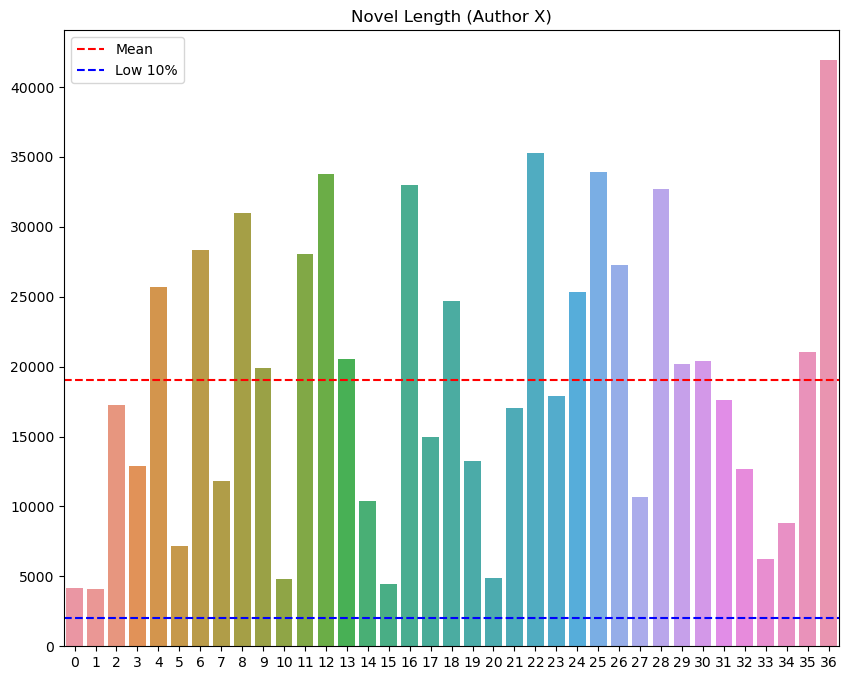

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_len_sum = np.mean(len_sum)
# percentile_10 = np.percentile(len_sum, 10)
percentile_10 = 2000

plt.figure(figsize=(10,8))
sns.barplot(x=len_sum.index, y=len_sum)
plt.axhline(mean_len_sum, color='red', linestyle='--', label=f'Mean')
plt.axhline(percentile_10, color='blue', linestyle='--', label=f'Low 10%')
plt.legend()
plt.title("Novel Length (Author X)")
plt.show()

In [55]:
titles[len_sum[len_sum < 5000].index]

array(['공방전(孔方傳)', '광문자전(廣文者傳)', '만복사저포기(萬福寺樗浦記)', '소설인규옥소선(掃雪因窺玉簫仙)',
       '예덕선생전(穢德先生傳)'], dtype=object)

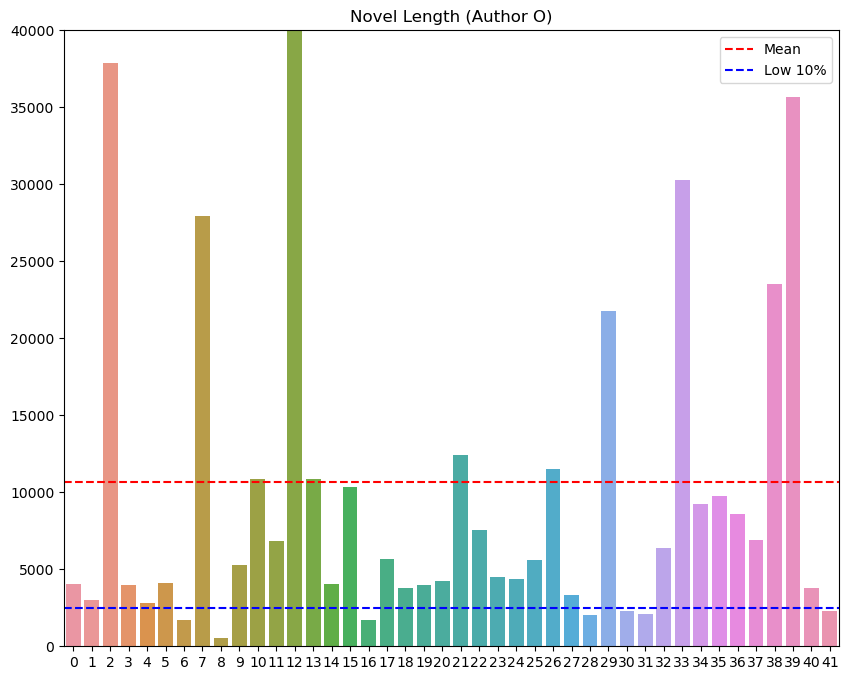

In [65]:
# 소설 길이
def novel_length(title):
    cc = df_author.loc[df_author["title"] == title, "cleaned_content"]
    return sum(cc.apply(lambda x: len(x)))

titles = df_author["title"].unique()
len_sum2 = []

for title in titles:
    len_sum2.append(novel_length(title))

len_sum2 = pd.Series(len_sum2)

mean_len_sum = np.mean(len_sum2)
# percentile_10 = np.percentile(len_sum2, 10)
percentile_10 = 2500

plt.figure(figsize=(10,8))
sns.barplot(x=len_sum2.index, y=len_sum2)
plt.axhline(mean_len_sum, color='red', linestyle='--', label=f'Mean')
plt.axhline(percentile_10, color='blue', linestyle='--', label=f'Low 10%')
plt.legend()
plt.ylim(top=40000)
plt.title("Novel Length (Author O)")
plt.show()

In [62]:
df_author.loc[df_author["title"] == '동방일사전(東方一士傳)', "cleaned_content"]

1921                                      동방일사란 자는
1922                                이름도 없고 성씨도 없어서
1923                               어떤 사람인가를 알 수 없고
1924                              다만 도연명의 팔운시에 의하여
1925                          그러한 사람이 있었음을 알았을 뿐이다
1926         그는 대체로 유송 의희년 사이의 사람으로서 동방에 은거한 사람이었다
1927                   이때 연명이 평택으로부터 벼슬을 버리고 돌아올 때
1928                                그의 소문을 듣고 기뻐하여
1929                                     곧 그를 찾아갔다
1930                           그 곳은 푸른 솔이 길 양편에 섰고
1931                              흰 구름은 처마 끝에 깊었는데
1932                             그 경지는 속세와 거리가 멀었다
1933                              가난하여 옷은 헤진 것을 입고
1934                      밥은 한 달에 아홉 번 밖에 먹지 못하였으며
1935                               갓 하나도 십년 동안을 썼다
1936                         그는 간군하고 괴로움이 이렇게 심했으나
1937                                 늘 좋은 얼굴을 지녔으며
1938                     이를 도리어 즐겁게 행각하여 가난을 잊곤 했다
1939                    그는 연명이 자기를 찾아온 뜻이 깊음을 짐작하고
1940                           

In [63]:
titles[len_sum2[len_sum2 < 2500].index]

array(['남령전(南靈傳)', '동방일사전(東方一士傳)', '손곡산인전(蓀谷山人傳)', '정시자전(丁侍者傳)', '진이(眞伊)',
       '청강사자현부전(淸江使者玄夫傳)', '화왕전(花王傳)'], dtype=object)

In [50]:
titles[6]

'남령전(南靈傳)'

In [16]:
titles = df_no_author["title"].unique()

max_pages  = []
for title in titles:
    p = df_no_author.loc[df_no_author["title"] == title].shape[0]
    max_pages.append(p)

In [19]:
import numpy as np

np.min(max_pages)
max_pages

[63,
 59,
 169,
 175,
 314,
 89,
 533,
 152,
 147,
 416,
 116,
 169,
 366,
 372,
 164,
 95,
 474,
 213,
 245,
 191,
 62,
 214,
 344,
 245,
 579,
 302,
 453,
 104,
 375,
 218,
 309,
 301,
 114,
 68,
 130,
 338,
 693]

In [27]:
import numpy as np

np.mean(length)

75.1440614662256

In [29]:
length[153]

271

In [28]:
length2 = df_author["cleaned_content"].apply(lambda x: len(x))
np.mean(length2)

66.13297872340425

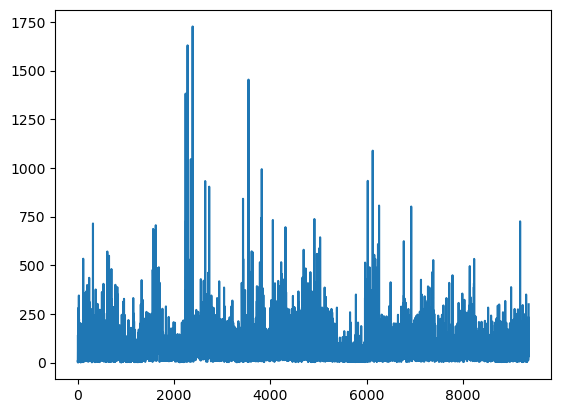

In [8]:
import matplotlib.pyplot as plt

plt.plot(length)

In [75]:
# None 값을 빈 문자열로 변환
df_no_author['author'] = df_no_author['author'].fillna('')
res = df_no_author.groupby(['title', 'page_number']).agg({'title': 'first',
                                                          'page_number': 'first',
                                                          'author': 'first',
                                                          "cleaned_content": ' '.join}).reset_index(drop=True)
res

,title,page_number,author,cleaned_content
0,광작(廣作),1,,동패낙송권 상
1,광작(廣作),2,,광작
2,광작(廣作),3,,여주에 허 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집에 세 아들을...
3,광작(廣作),4,,허씨 양반 내외가 구몰하자 삼년상까지는 고을 사람들의 부조가 컸다. 십년상을 마친 ...
4,광작(廣作),5,,“우리가 오늘까지 굶어 죽지 않은 것은 오로지 부모가 인심을 얻으신 덕분 아니오? ...
...,...,...,...,...
9366,홍계월전(洪桂月傳),690,,"하였거늘, 평국과 보국이 보기를 다하매 체읍하며 그 은혜를 생각하여 공중을 향하여 ..."
9367,홍계월전(洪桂月傳),691,,"이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시..."
9368,홍계월전(洪桂月傳),692,,"“오, 초 양국이 정사폐한지 오래매 급히 행하여 국사를 다스리라.”"
9369,홍계월전(洪桂月傳),693,,"하시고 길을 재촉하시니 황은을 축수하고 물러나와 치행을 차려 떠날새, 부사 불러 서..."


In [78]:
res_len = res["cleaned_content"].apply(lambda x: len(x))

704175

In [79]:
sum(res_len[:10])

673

In [88]:
list(res.loc[:50, "cleaned_content"])

['동패낙송권 상',
 '광작',
 '여주에 허 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들이 입에 풀칠을 하는데, 그가 어질고 착한 덕분으로 모두 동정하여 구걸에 응해주었다.',
 '허씨 양반 내외가 구몰하자 삼년상까지는 고을 사람들의 부조가 컸다. 십년상을 마친 다음 둘째아들 공이 형과 아우에게 말하기를,',
 '“우리가 오늘까지 굶어 죽지 않은 것은 오로지 부모가 인심을 얻으신 덕분 아니오? 이제 삼년상이 끝나 부모님의 여덕에 더 의지할 수도 없는 일이니, 이런 곤궁한 형세로서 다같이 몰사지경에 갈밖에 도리 없오. 우선 각기 살아갈 방도를 차리는 것이 옳겠오."',
 '형과 아우는 다같이',
 '“본디 배운 글공부 내놓고는 다시 도리 없지."',
 '공은',
 '“각기 자기 뜻을 따를지라. 굳이 다른 길을 권하지는 않겠으나, 삼형제가 모두 글공부만 일삼다가는 기한에 굶어죽기 알맞소. 내 아무렇거나 10년 기한하고 목숨을 걸고 치산을 하여 은집을 구하겠오. 결단코 오늘로 파산을 하여 형님과 아우는 절로 올라가서 중들에게 얻어먹으며 공부를 계속하고, 두 아주머니는 친정에 돌아가시지 않을 수 없어요. 부모의 세업이라고는 단지 저 보리밭 세 두락과 가대, 아이 계집종 하나뿐인데, 이는 의당 종물이 되겠으나, 형님이 이제 파산하시니 우선 제가 빌림이 좋겠습니다."',
 '했다.',
 '이 날 형제 내외들이 서로 눈물을 뿌리며 분산한 것이다.',
 '공은 즉시 아내의 몸에 딸린 물건을 팔아서 육칠 꿰미의 돈을 마련했다. 때마침 면화가 풍년이어서 미역을 사서 등에 지고 부모가 일찍이 내왕하던 집을 두루 찾아다니며 집집마다 미역을 내놓고 안면을 가리고 면화를 구걸하니, 모두 옛 정의를 생각하고 가난을 동정하여 넉넉히들 바꾸어주어서 걷어들인 면화가 호부를 물론하고 수백 근이 되는 것이었다.',
 '강원도의 귀리 100여 석을 사서 10년간 죽만 먹기로 굳게 약속을 정했다. 계

In [86]:
for i in res.loc[:50, "cleaned_content"]:
    print(i)

동패낙송권 상
광작
여주에 허 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들이 입에 풀칠을 하는데, 그가 어질고 착한 덕분으로 모두 동정하여 구걸에 응해주었다.
허씨 양반 내외가 구몰하자 삼년상까지는 고을 사람들의 부조가 컸다. 십년상을 마친 다음 둘째아들 공이 형과 아우에게 말하기를,
“우리가 오늘까지 굶어 죽지 않은 것은 오로지 부모가 인심을 얻으신 덕분 아니오? 이제 삼년상이 끝나 부모님의 여덕에 더 의지할 수도 없는 일이니, 이런 곤궁한 형세로서 다같이 몰사지경에 갈밖에 도리 없오. 우선 각기 살아갈 방도를 차리는 것이 옳겠오."
형과 아우는 다같이
“본디 배운 글공부 내놓고는 다시 도리 없지."
공은
“각기 자기 뜻을 따를지라. 굳이 다른 길을 권하지는 않겠으나, 삼형제가 모두 글공부만 일삼다가는 기한에 굶어죽기 알맞소. 내 아무렇거나 10년 기한하고 목숨을 걸고 치산을 하여 은집을 구하겠오. 결단코 오늘로 파산을 하여 형님과 아우는 절로 올라가서 중들에게 얻어먹으며 공부를 계속하고, 두 아주머니는 친정에 돌아가시지 않을 수 없어요. 부모의 세업이라고는 단지 저 보리밭 세 두락과 가대, 아이 계집종 하나뿐인데, 이는 의당 종물이 되겠으나, 형님이 이제 파산하시니 우선 제가 빌림이 좋겠습니다."
했다.
이 날 형제 내외들이 서로 눈물을 뿌리며 분산한 것이다.
공은 즉시 아내의 몸에 딸린 물건을 팔아서 육칠 꿰미의 돈을 마련했다. 때마침 면화가 풍년이어서 미역을 사서 등에 지고 부모가 일찍이 내왕하던 집을 두루 찾아다니며 집집마다 미역을 내놓고 안면을 가리고 면화를 구걸하니, 모두 옛 정의를 생각하고 가난을 동정하여 넉넉히들 바꾸어주어서 걷어들인 면화가 호부를 물론하고 수백 근이 되는 것이었다.
강원도의 귀리 100여 석을 사서 10년간 죽만 먹기로 굳게 약속을 정했다. 계집종은 한 사발을 주고 그들 부처는 반 사발을 들면서 계집종에게 말했다.
“주림을 정 견디

In [82]:
res.to_csv("df_no_author_chunk.csv", index=False)
res2.to_csv("df_with_author_chunk.csv", index=False)

In [81]:
for r in res["cleaned_content"][:10]:
    print(r)

동패낙송권 상
광작
여주에 허 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들이 입에 풀칠을 하는데, 그가 어질고 착한 덕분으로 모두 동정하여 구걸에 응해주었다.
허씨 양반 내외가 구몰하자 삼년상까지는 고을 사람들의 부조가 컸다. 십년상을 마친 다음 둘째아들 공이 형과 아우에게 말하기를,
“우리가 오늘까지 굶어 죽지 않은 것은 오로지 부모가 인심을 얻으신 덕분 아니오? 이제 삼년상이 끝나 부모님의 여덕에 더 의지할 수도 없는 일이니, 이런 곤궁한 형세로서 다같이 몰사지경에 갈밖에 도리 없오. 우선 각기 살아갈 방도를 차리는 것이 옳겠오."
형과 아우는 다같이
“본디 배운 글공부 내놓고는 다시 도리 없지."
공은
“각기 자기 뜻을 따를지라. 굳이 다른 길을 권하지는 않겠으나, 삼형제가 모두 글공부만 일삼다가는 기한에 굶어죽기 알맞소. 내 아무렇거나 10년 기한하고 목숨을 걸고 치산을 하여 은집을 구하겠오. 결단코 오늘로 파산을 하여 형님과 아우는 절로 올라가서 중들에게 얻어먹으며 공부를 계속하고, 두 아주머니는 친정에 돌아가시지 않을 수 없어요. 부모의 세업이라고는 단지 저 보리밭 세 두락과 가대, 아이 계집종 하나뿐인데, 이는 의당 종물이 되겠으나, 형님이 이제 파산하시니 우선 제가 빌림이 좋겠습니다."
했다.


In [76]:
# None 값을 빈 문자열로 변환
df_author['author'] = df_author['author'].fillna('')
res2 = df_author.groupby(['title', 'page_number']).agg({'title': 'first',
                                                          'page_number': 'first',
                                                          'author': ' '.join,
                                                          "cleaned_content": ' '.join}).reset_index(drop=True)
res2

,title,page_number,author,cleaned_content
0,공방전(孔方傳),1,임춘,공방전
1,공방전(孔方傳),2,임춘 임춘 임춘,"공방의 자는 관지다. 공방이란 구멍이 모가 나게 뚫린 돈, 관지는 돈의 꿰미를 뜻한..."
2,공방전(孔方傳),3,임춘 임춘 임춘,그는 처음 황제 시절에 조금 조정에 쓰였으나 워낙 성질이 굳세어 원래 세상일에는 그...
3,공방전(孔方傳),4,임춘,"""이는 산야의 성질을 가져서 쓸 만한 것이 못 됩니다. 그러하오나 폐하께서 만일 만..."
4,공방전(孔方傳),5,임춘,이리하여 공방은 차츰 그 이름이 세상에 나타나기 시작했다.
...,...,...,...,...
6763,화왕전(花王傳),137,이이순(李頤淳),도리어 매화국화만도 못하게 되었으니
6764,화왕전(花王傳),138,이이순(李頤淳),이는 부귀한 잃어버리기 쉬운 까닭이었다
6765,화왕전(花王傳),139,이이순(李頤淳),아아
6766,화왕전(花王傳),140,이이순(李頤淳),사람에게 가장 고귀한 것은


In [8]:
# title, author 기준 각 소설 수
print(f'고전 소설 X: {len(df_no_author[["title", "author"]].drop_duplicates())}')
print(f'고전 소설 O: {len(df_author[["title", "author"]].drop_duplicates())}')

고전 소설 X: 37
고전 소설 O: 42


## 문장 분리하기

In [16]:
import sys
import google.protobuf.text_format as tf
from bareunpy import Tagger

API_KEY="koba-BRBCJ3A-OA4UPJY-QXV5GSI-MU2WLMY"  # 본인 API 키 등록
tagger = Tagger(API_KEY, 'localhost')

In [46]:
from tqdm import tqdm

# 작가 X
# title 초기화
current_title = df_no_author["title"].unique()[0]
splitted_sents = []

for sentence in tqdm(df_no_author["cleaned_content"]):
    res = tagger.tags([sentence], auto_split=True)
    ss = res.as_json()["sentences"]
    splitted_sents.append([s["refined"] for s in ss])

100%|██████████| 11665/11665 [15:15<00:00, 12.74it/s] 


In [61]:
df_no_author["sentence"][:10].apply(lambda x: len(x))

0     18
1      6
2     24
3     19
4     93
5     37
6     36
7    142
8     10
9     26
Name: sentence, dtype: int64

In [47]:
df_no_author["splitted"] = splitted_sents
df_no_author.explode(column=["splitted"], ignore_index=True)

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,transformed,splitted
0,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,1,《동패낙송(東稗洛誦)》권 상(上),《동패낙송(東稗洛誦)》권 상(上),동패낙송권 상,0.000000,7,NaN,동패낙송권 상
1,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,2,광작(廣作),광작(廣作),광작,0.000000,2,NaN,광작
2,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,여주(驪州)에 허(許) 성의 양반이 있었다.,여주에 허 성의 양반이 있었다.,0.000000,17,NaN,여주에 허 성의 양반이 있었다.
3,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,그는 어질고 착하나 몹시 가난했다.,그는 어질고 착하나 몹시 가난했다.,0.181818,19,NaN,그는 어질고 착하나 몹시 가난했다.
4,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,0.145833,93,NaN,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...
...,...,...,...,...,...,...,...,...,...,...,...
12402,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,693,"하시고 길을 재촉하시니 황은(皇恩)을 축수하고 물러나와 치행을 차려 떠날새, 부사 ...","하시고 길을 재촉하시니 황은(皇恩)을 축수하고 물러나와 치행을 차려 떠날새, 부사 ...","하시고 길을 재촉하시니 황은을 축수하고 물러나와 치행을 차려 떠날새, 부사 불러 서...",0.216216,64,NaN,"하시고 길을 재촉하시니 황은을 축수하고 물러나 와 치행을 차려 떠날새 , 부사 불러..."
12403,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,694,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,0.176000,271,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,이적에 승상 보국이 45세였다.
12404,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,694,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,0.176000,271,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,"삼남 일녀를 두었으니 영민총혜한지라 . 장자로 오국 태자를 봉하여 보내고 , 차차는..."
12405,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,694,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,0.176000,271,이적에 승상 보국이 45세였다. 삼남 일녀를 두었으니 영민총혜한지라. 장자로 오국 ...,"계월이 자손이 대대로 공후작록을 누리고 지우만세 하여 전지 무궁하니 , 이런 장하고..."


In [ ]:
from tqdm import tqdm

# 작가 O
# title 초기화
current_title = df_author["title"].unique()[0]
splitted_sents = []

for sentence in tqdm(df_author["cleaned_content"]):
    res = tagger.tags([sentence], auto_split=True)
    ss = res.as_json()["sentences"]
    splitted_sents.append([s["refined"] for s in ss])

In [10]:
df_no_author[["title", "author"]].drop_duplicates()

,title,author
0,광작(廣作),NaN
87,귀향(歸鄕),NaN
170,금방울전(金鈴傳),미상
398,김령(金令),NaN
695,김원전(金圓傳),NaN
1069,까치전,미상
1181,박씨전(朴氏傳),미상
1359,박씨전 (고대본)(朴氏傳),NaN
1962,방한림전(方翰林傳),미상.
2340,배비장전(裵裨將傳),미상


In [15]:
max(df_no_author["cleaned_content"].apply(lambda x: len(x)))

1454

In [11]:
df_no_author[df_no_author["title"] == "광작(廣作)"]

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,transformed
0,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,1,《동패낙송(東稗洛誦)》권 상(上),《동패낙송(東稗洛誦)》권 상(上),동패낙송권 상,0.000000,7,NaN
1,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,2,광작(廣作),광작(廣作),광작,0.000000,2,NaN
2,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,여주(驪州)에 허(許) 성의 양반이 있었다.,여주에 허 성의 양반이 있었다.,0.000000,17,NaN
3,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,그는 어질고 착하나 몹시 가난했다.,그는 어질고 착하나 몹시 가난했다.,0.181818,19,NaN
4,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,0.145833,93,NaN
...,...,...,...,...,...,...,...,...,...,...
82,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,60,첫 외임이 안악(安岳) 군수이었다. 곧 부임할 즈음에 아내가 병사했다.,첫 외임이 안악(安岳) 군수이었다.,첫 외임이 안악 군수이었다.,0.000000,15,NaN
83,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,60,첫 외임이 안악(安岳) 군수이었다. 곧 부임할 즈음에 아내가 병사했다.,곧 부임할 즈음에 아내가 병사했다.,곧 부임할 즈음에 아내가 병사했다.,0.000000,19,NaN
84,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,61,공은,공은,공은,0.000000,2,NaN
85,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,62,"“내 이미 영감하(永感下)라 벼슬로 봉양함이 미치지 못하고, 다만 아내를 영광스럽게...","“내 이미 영감하(永感下)라 벼슬로 봉양함이 미치지 못하고, 다만 아내를 영광스럽게...","“내 이미 영감하라 벼슬로 봉양함이 미치지 못하고, 다만 아내를 영광스럽게 할까 했...",0.137255,93,NaN


In [9]:
df_author[["title", "author"]].drop_duplicates()

,title,author
0,공방전(孔方傳),임춘
87,광문자전(廣文者傳),박지원
150,구운몽(九雲夢),김만중
950,국선생전(麴先生傳),이규보
1023,국순전(麴醇傳),임춘
1092,김신선전(金神仙傳),박지원
1197,남령전(南靈傳),이옥
1221,도술이 유명한 소강절,이종정(李鍾楨)
2266,동방일사전(東方一士傳),이익
2296,마장전(馬駔傳),박지원


* 추가

In [1]:
import pandas as pd

df_no_author = pd.read_csv("df_no_author_tf(추가).csv")

In [5]:
df_no_author.shape

(6403, 9)

In [10]:
print(df_no_author.loc[2, "sentence"])
print(df_no_author.loc[3, "sentence"])

환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.
환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에게 붙들려 조복(朝服)을 입고 겨우 들어가 입조(入朝)하자, 황제가 크게 기뻐하여 자리를 주시고 이어 백대 제와의 치란흥망(治亂興亡)과 만고의 문장명필을 의논할 때, 상서가 고금의 제왕을 역력히 의논하고 문장을 차례로 헤아리니, 황제가 크게 기뻐하여 말하였다.


In [9]:
df_no_author[df_no_author.duplicated(subset=['context', 'sentence'])]

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len
2,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,0.125000,49
3,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에...,환자가 급히 명패로 부르니 상서가 취중에 정신을 차리지 못하여 창기에게 붙들려 조복...,0.164706,169
6,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,738,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...",모든 궁녀들이 차례로 늘어서 혹 좋은 화선지와 비단 수건이며 그림 그린 부채를 들고...,모든 궁녀들이 차례로 늘어서 혹 좋은 화선지와 비단 수건이며 그림 그린 부채를 들고...,0.129032,113
7,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,738,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","순식간에 궁녀에게 다 지어 주니 궁녀들이 그 글을 가지고 차례로 황제께 드리자, 황...","순식간에 궁녀에게 다 지어 주니 궁녀들이 그 글을 가지고 차례로 황제께 드리자, 황...",0.191489,85
8,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,738,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","궁녀가 다투어 각각 술을 드리니 상서가 받는 듯, 주는 듯 삼십여 잔을 마신 후에 ...","궁녀가 다투어 각각 술을 드리니 상서가 받는 듯, 주는 듯 삼십여 잔을 마신 후에 ...",0.108108,66
...,...,...,...,...,...,...,...,...,...
6349,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),,879,"읽기를 다하매 왕과 제신이 일시의 통곡하니, 산천초목이 슬퍼하는 듯하더라. 왕이 사...","왕이 사관을 위하여 예단을 후히 하고, 천은이 망극함을 못내 일컬으며 멀리 나와 전...","왕이 사관을 위하여 예단을 후히 하고, 천은이 망극함을 못내 일컬으며 멀리 나와 전...",0.153846,51
6370,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),,899,"하고 인하여 하직하고 가거늘, 왕이 신기히 여겨 다시 말을 묻고자 하다가 홀연 계하...","왕이 정신을 차려 자리를 보니 환약이 놓였거늘, 심중에 의혹하여 집어 간수하고 즉시...","왕이 정신을 차려 자리를 보니 환약이 놓였거늘, 심중에 의혹하여 집어 간수하고 즉시...",0.196429,104
6376,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),,904,"하고 함께 발행할새, 좌승상 석침을 데리고 황성으로 향하니라. 여러 날 만에 황성의...","여러 날 만에 황성의 다다르니, 홀연 수천 군마가 내달아 위왕을 에워싸며 무수히 핍...","여러 날 만에 황성의 다다르니, 홀연 수천 군마가 내달아 위왕을 에워싸며 무수히 핍...",0.189655,125
6391,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),,918,하시고 좌우를 돌아보시니 조충 등 팔십여 인이 다 간신이라. 상이 그 환약을 진어(...,상이 그 환약을 진어(進御)하신 후로 흐리던 정신이 맑아지고 어두운 마음이 온전하여...,상이 그 환약을 진어하신 후로 흐리던 정신이 맑아지고 어두운 마음이 온전하여 누구는...,0.119048,83


In [2]:
# None 값을 빈 문자열로 변환
df_no_author['author'] = df_no_author['author'].fillna('')
res = df_no_author.groupby(['title', 'page_number']).agg({'title': 'first',
                                                          'page_number': 'first',
                                                          'author': 'first',
                                                          "cleaned_content": ' '.join}).reset_index(drop=True)
res

,title,page_number,author,cleaned_content
0,구운몽(九雲夢),735,김만중,구운몽 하
1,구운몽(九雲夢),736,김만중,"천자가 환자를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가 오지 ..."
2,구운몽(九雲夢),737,김만중,내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? 짐...
3,구운몽(九雲夢),738,김만중,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양..."
4,구운몽(九雲夢),739,김만중,황제가 말하였다.
...,...,...,...,...
4371,현수문전 (경판본)(玄壽文傳),924,,"왕이 이 말을 듣고 희허 탄하며 이르기를,"
4372,현수문전 (경판본)(玄壽文傳),925,,"선왕이 매양 석참정 산소에 자주 친행하심을 과인이 잊지 아니하였으나, 그 사이 삼년..."
4373,현수문전 (경판본)(玄壽文傳),926,,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...
4374,현수문전 (경판본)(玄壽文傳),927,,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자..."


[169, 500, 455, 583, 387, 357, 575, 293, 297]

In [17]:
res.title.unique()

array(['구운몽(九雲夢)', '금방울전(金鈴傳)', '숙향전(淑香傳)', '열녀춘향수절가(烈女春香守節歌)',
       '유충렬전(劉忠烈傳)', '임진록(壬辰錄)', '현수문전 (경판본)(玄壽文傳)'], dtype=object)

In [15]:
a = [178, 872, 482, 344, 674, 631]
sum(a)

3181

In [16]:
print(df_with.shape)
print(df_no.shape)

(785, 4)
(3591, 4)


In [19]:
df_with.to_csv("df_with_author_chunk(추가).csv", index=False)
df_no.to_csv("df_no_author_chunk(추가).csv", index=False)